In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base(

)
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

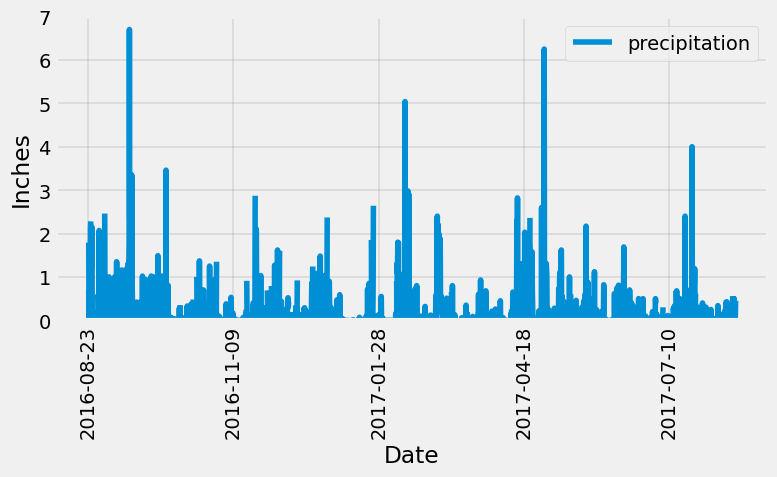

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_prior = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
one_year_data = []
one_year_data = session.query(measurement.date, measurement.prcp)\
    .filter(measurement.date >= one_year_prior).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
measurement_df = pd.DataFrame(one_year_data, columns = ['date', 'precipitation'] )

# Sort the dataframe by date
measurement_df.set_index('date', inplace = True)
measurement_df.sort_index(inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
measurement_df.plot.line(figsize = [8,5])
plt.legend(loc = 'best')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.ylim(0,7)
plt.xticks(rotation = 90)
plt.grid(True, color = "grey", linewidth = '0.25')
plt.tight_layout()
plt.savefig("Resources/Fig1.png")
plt.show()



In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
measurement_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(measurement.station).distinct().count()

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)

# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station))\
    .group_by(measurement.station)\
    .order_by(func.count(measurement.station).desc()).all()

most_active_stations



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
minimum_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
maximum_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
average_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
print(minimum_temp, maximum_temp, average_temp)


[(54.0,)] [(85.0,)] [(71.66378066378067,)]


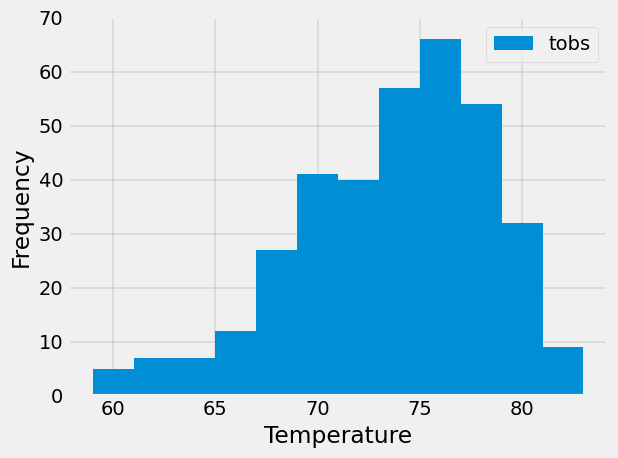

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Query to find most recent date for station USC00519281
most_active_station_most_recent = session.query(measurement.date, measurement.tobs)\
.filter(measurement.station == 'USC00519281').order_by(measurement.date.desc()).first()

#Query to find 12 months of temperature data for station USC00519281
one_year_most_active_station_data = session.query(measurement.date, measurement.tobs)\
.filter(measurement.station == 'USC00519281')\
.filter(measurement.date > '2016-08-17' ).all()

#Convert data to DataFrame
one_year_tobs_data_df = pd.DataFrame(one_year_most_active_station_data)['tobs'] 

#Plot histogram
one_year_tobs_data_df.plot.hist(bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.ylim(0,70)
plt.legend(loc = 'best')
plt.grid(True, color = "grey", linewidth = '0.25')
plt.tight_layout()
plt.savefig("Resources/Fig2.png")
plt.show()





# Close Session

In [16]:
# Close Session
session.close()